# Oura Ring Semi-Continuous Data Extraction

## Author Information

Author: Sjors Weggeman

Student number: s4799771

University: Radboud University Nijmegen

## Imports

In [10]:
import json
import matplotlib.pyplot as plt
import numpy
from jsonmerge import merge

Thalia's addition (the following code cell):

In [11]:
# Combining all json files obtained from https://cloud.ouraring.com/profile 
with open('/Users/user/Desktop/Msc AI RU/Internship/Code/oura_json/oura_sleep_2022-12-06T10-07-33.json') as f:
    data1 = json.load(f)

with open('/Users/user/Desktop/Msc AI RU/Internship/Code/oura_json/oura_daily-readiness_2022-12-06T10-07-44.json') as f:
    data2 = json.load(f)

all_oura = merge(data1, data2)

json_string = json.dumps(all_oura)
with open('oura_json/all_json_oura.json', 'w') as outfile:
    outfile.write(json_string)

## Loading the data

In [12]:
# Opening the file
file = open('/Users/user/Desktop/Msc AI RU/Internship/Code/oura_json/all_json_oura.json')

# Loading the file into a workable dataframe
data = json.load(file)

## Data Inspection

In [13]:
# Inspecting the data by printing the first entry of every section (bold) of the data
for i in data: 
    counter=-1
    print('\033[1m'+i+'\033[0m') 
    for j in data[i]:
        counter+=1
        if counter==0:
            for k in j:
                print(k+': '+repr(j[k]))
    print('counter=',counter,'\n')

sleep
bedtime_end: '2022-06-09T07:03:09+02:00'
bedtime_start: '2022-06-08T23:01:09+02:00'
contributors: {'total_sleep': None, 'deep_sleep': None, 'rem_sleep': None, 'efficiency': None, 'latency': None, 'restfulness': None, 'timing': None}
day: '2022-06-09'
heart_rate: {'interval': 300, 'items': [], 'timestamp': '2022-06-08T23:01:09+02:00'}
hrv: {'interval': 300, 'items': [], 'timestamp': '2022-06-08T23:01:09+02:00'}
period: 0
segment_state: 'active'
time_in_bed: 28920
type: 'rest'
sleep_phase_5_min: None
restless: None
timezone: 120
bedtime_start_delta: -3531
bedtime_end_delta: 25389
midpoint_at_delta: None
counter= 175 

daily_readiness
contributors: {'activity_balance': None, 'body_temperature': 100, 'hrv_balance': None, 'previous_day_activity': None, 'previous_night': 82, 'recovery_index': 100, 'resting_heart_rate': 100, 'sleep_balance': None}
day: '2022-06-10'
score: 93
temperature_deviation: 0.0
counter= 164 



In [14]:
# Visualizing the last entry in the sleep data
print(data['sleep'][175])

{'average_breath': 14.5, 'average_breath_variation': 2.625, 'average_heart_rate': 58.14, 'average_hrv': 58, 'awake_time': 2190, 'bedtime_end': '2022-12-06T08:11:36+01:00', 'bedtime_start': '2022-12-05T23:39:36+01:00', 'contributors': {'total_sleep': 91, 'deep_sleep': 100, 'rem_sleep': 97, 'efficiency': 98, 'latency': 70, 'restfulness': 76, 'timing': 76}, 'day': '2022-12-06', 'deep_sleep_duration': 8850, 'efficiency': 93, 'got_ups': 0, 'heart_rate': {'interval': 300, 'items': [60.0, 60.0, 60.0, 56.0, 59.0, 55.0, 58.0, 55.0, 55.0, 53.0, 54.0, 55.0, 56.0, 56.0, 56.0, 57.0, 56.0, 57.0, 57.0, 57.0, 57.0, 64.0, 65.0, 66.0, 62.0, 61.0, 59.0, 59.0, 58.0, 57.0, 57.0, 57.0, 57.0, 58.0, 57.0, 57.0, 56.0, 52.0, 54.0, 55.0, 54.0, 56.0, 55.0, 64.0, 60.0, 58.0, 60.0, 58.0, 57.0, 56.0, 57.0, 57.0, 57.0, 58.0, 58.0, 57.0, 59.0, 57.0, 58.0, 59.0, 59.0, 59.0, 54.0, 58.0, 60.0, 60.0, 59.0, 60.0, 58.0, 58.0, 58.0, 58.0, 57.0, 58.0, 56.0, 57.0, 58.0, 58.0, 58.0, 63.0, 62.0, 64.0, 66.0, 65.0, 63.0, 65.0, 64.

## Visualizing the data

Below I will visualize the semi-continuous sleep data, with which I mean to refer to the data entries that are measured once every five minutes. Respectively the ‘hr_5min’, the ‘hypnogram_5min’ and the ‘rmssd_5min’ variables.

/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


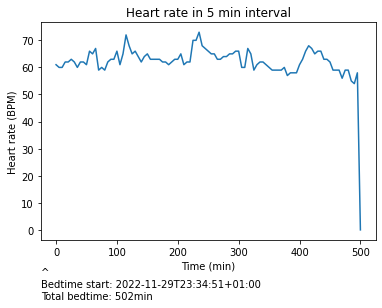

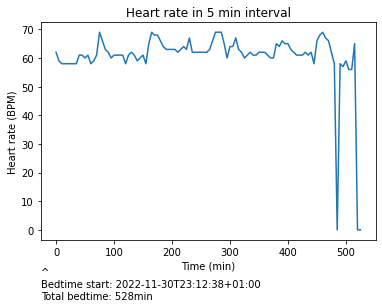

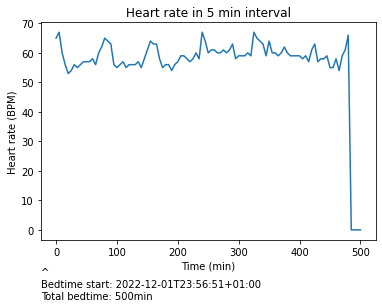

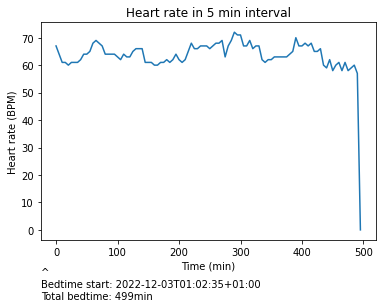

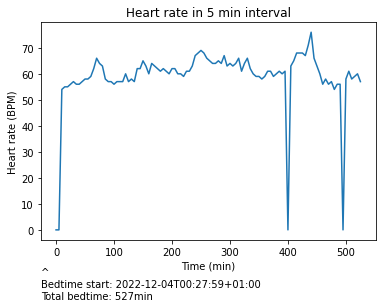

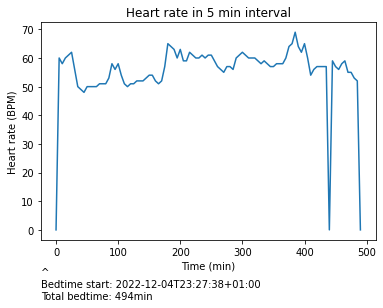

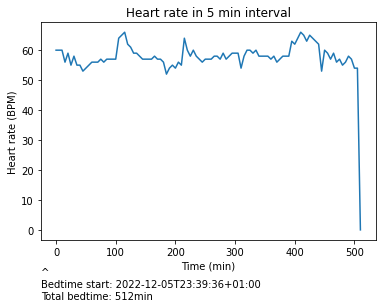

In [15]:
# Plotting the heart rate as measured in 5 minute intervals for the last week covered by the dataset
counter=-1
for i in data['sleep']:
    counter+=1
    if counter>(175-7):
        hr5=i['heart_rate']['items']
        fig,ax=plt.subplots()
        ax.plot(hr5)
        ax.set_title('Heart rate in 5 min interval')
        ax.set_ylabel('Heart rate (BPM)')
        ax.set_xlabel('Time (min)') 
        ax.set_xticklabels(['-1','0','100','200','300','400','500','600']) 
        fig.show()
        fig.text(0.125,-0.08,'^\nBedtime start: {}\nTotal bedtime: {}min'.format(i['bedtime_start'],int(i['time_in_bed']/60)))

In this data we can see that the heart rate sometimes drops to 0. Assuming that the person didn’t suddenly die multiple times during these nights, I decided to resolve this by taking the average heart rate of the entire measurement period and change all the zero values to this average. Since this value is most likely a non-integer value like the heartbeats, it should be easy to see in the plots where the values were zero. In order to make this even more clear, I also plotted the average heart rate in each plot. I decided to use the average heart rate for this, because then the average isn’t influenced by this outlier removal.

/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


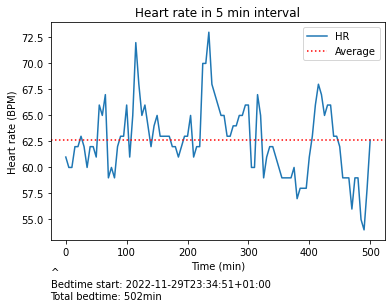

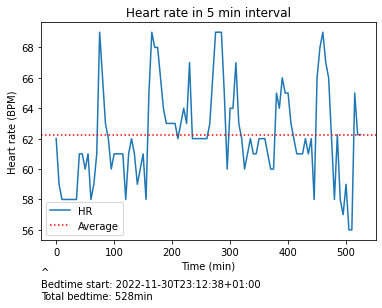

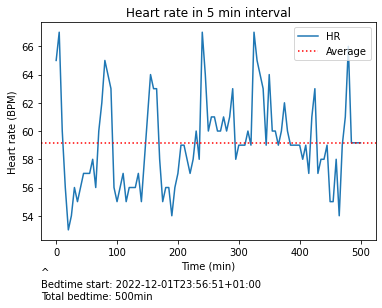

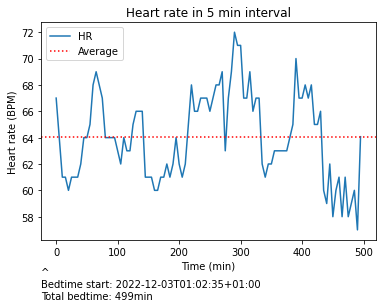

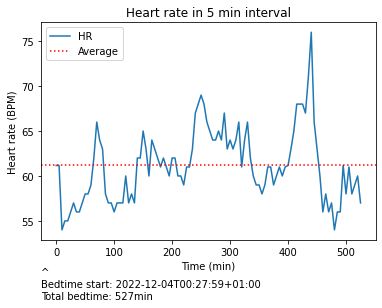

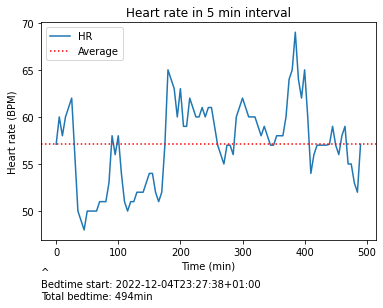

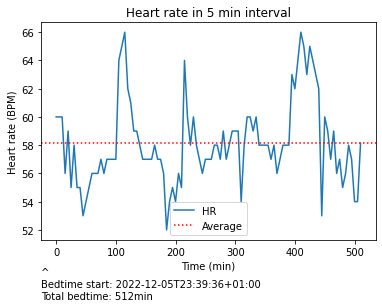

In [16]:
# Removing 0 values from the heart rate data as measured in 5 minute intervals for the last week covered by the dataset and plotting it again
counter=-1
for i in data['sleep']:
    counter+=1
    if counter>(175-7):
        hr5=i['heart_rate']['items'] 
        n_nonzero=len(numpy.nonzero(hr5)[0]) 
        nonzero_sum=0
        for j in numpy.nonzero(hr5)[0]:
            nonzero_sum+=hr5[j] 
        nonzero_avg=nonzero_sum/n_nonzero 
        for k in range(0,len(hr5)):
            if hr5[k]==0: 
                hr5[k]=nonzero_avg
        fig,ax=plt.subplots()
        ax.plot(hr5)
        ax.axhline(y=nonzero_avg,c='r',linestyle='dotted') 
        ax.set_title('Heart rate in 5 min interval')
        ax.set_ylabel('Heart rate (BPM)')
        ax.set_xlabel('Time (min)') 
        ax.set_xticklabels(['-1','0','100','200','300','400','500','600']) 
        ax.legend(['HR','Average'])
        fig.text(0.125,-0.08,'^\nBedtime start: {}\nTotal bedtime: {}min'.format(i['bedtime_start'],int(i['time_in_bed']/60)))

To interpret the following hypnograms it is necessary to know which sleepstage number corresponds to which sleepstage. This information can be found on: https://cloud.ouraring.com/docs/sleep under the header sleep.hypnogram_5min.

The measurements are taken at the start of every 5 minutes since bedtime_start, which is also a variable in the sleep data.
The sleep stage numbers correspond to: 
1. Deep sleep (N3)
2. Light sleep (N1 or N2)
3. REM sleep
4. Awake

I have adapted the tick labels on the y-axis to match these names for clarity. Furthermore, I have also printed the ‘bedtime_start’ and ‘duration’ variables, for completeness.

/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/

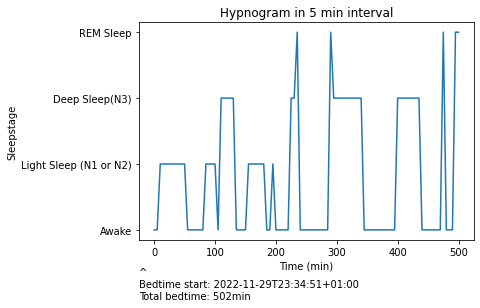

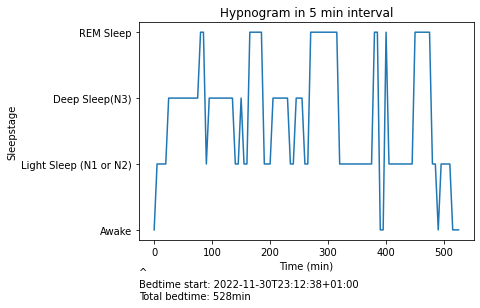

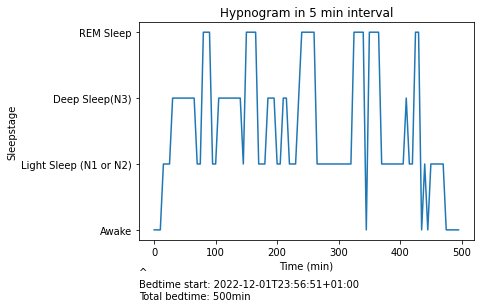

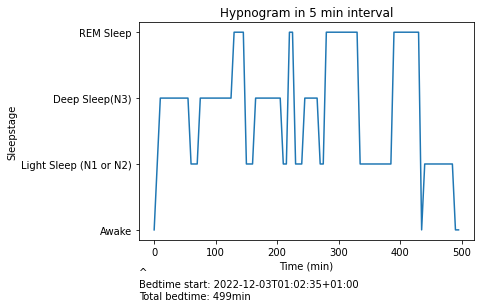

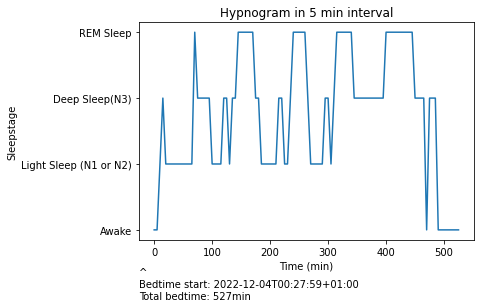

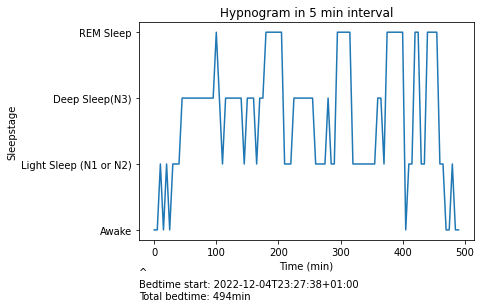

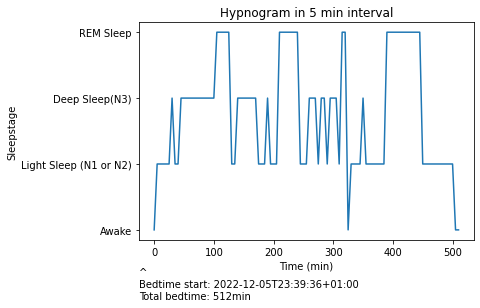

In [17]:
# Plotting the hypnograms for the last week
counter=-1
for i in data['sleep']:
    counter+=1 
    hg5_conc=i['sleep_phase_5_min'] 
    hg5_split=[]
    if counter>(175-7):
        for j in hg5_conc: 
            hg5_split.append(j)
        fig, ax=plt.subplots()
        ax.plot(hg5_split)
        ax.set_title('Hypnogram in 5 min interval')
        ax.set_ylabel('Sleepstage')
        ax.set_yticklabels(['Awake','Light Sleep (N1 or N2)','Deep Sleep(N3)','REM Sleep'])
        ax.set_xlabel('Time (min)\n') 
        ax.set_xticklabels(['-1','0','100','200','300','400','500','600']) 
        fig.text(0.125,-0.08,'^\nBedtime start: {}\nTotal bedtime: {}min'.format(i['bedtime_start'],int(i['time_in_bed']/60)))

In order to be able to understand the following section, some prior knowledge is required:

The root mean square of successive differences (rMSSD) is a method to calculate the heart rate variability. ‘[It] reflects the beat-to-beat variance in the heart rate’. (Shaffer & Ginsberg; 2017)

Furthermore, since this data is based on the heart rate, it will also contain the presumed to be faulty zero measurements, hence I will apply the same outlier removal as described earlier: replacing the zero values by the average over the entire measurement period, visualized for clarity by an additional average line which is most likely located on a non-integer value.

/Users/user/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


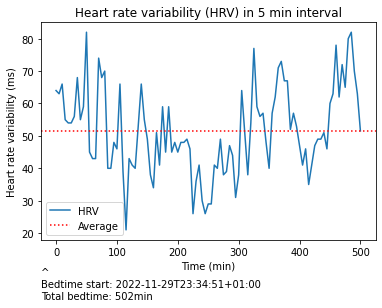

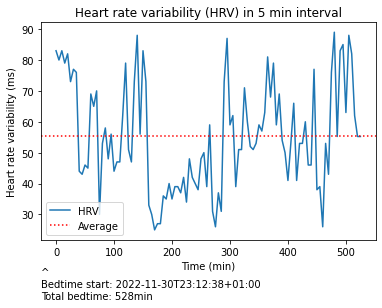

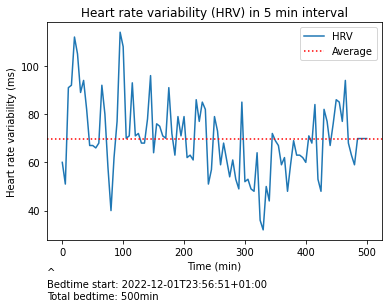

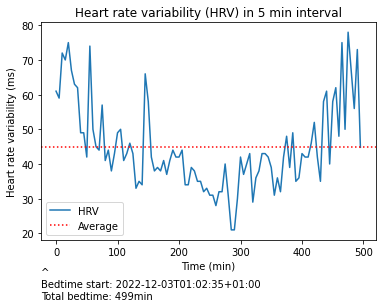

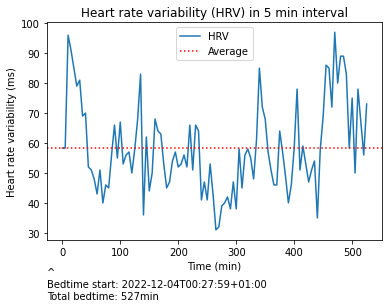

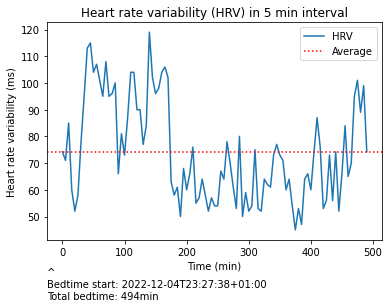

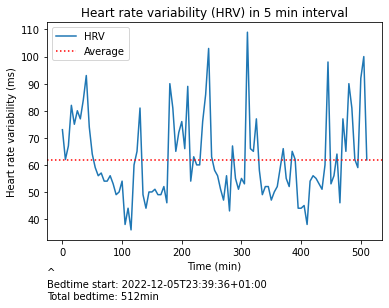

In [18]:
# Removing 0 values in the continuous data and plotting it for the last week
counter=-1
for i in data['sleep']:
    counter+=1
    if counter>(175-7):
        hrv=i['hrv']['items']
        n_nonzero=len(numpy.nonzero(hrv)[0]) 
        nonzero_sum=0
        for j in numpy.nonzero(hrv)[0]:
            nonzero_sum+=hrv[j] 
        nonzero_avg=nonzero_sum/n_nonzero 
        for k in range(0,len(hrv)):
            if hrv[k]==0: 
                hrv[k]=nonzero_avg
        fig,ax=plt.subplots()
        ax.plot(hrv)
        ax.axhline(y=nonzero_avg,c='r',linestyle='dotted') 
        ax.set_title('Heart rate variability (HRV) in 5 min interval') 
        ax.set_ylabel('Heart rate variability (ms)')
        ax.set_xlabel('Time (min)') 
        ax.set_xticklabels(['-1','0','100','200','300','400','500','600']) 
        ax.legend(['HRV','Average'])
        fig.text(0.125,-0.08,'^\nBedtime start: {}\nTotal bedtime: {}min'.format(i['bedtime_start'],int(i['time_in_bed']/60)))